<a href="https://colab.research.google.com/github/madhu-80019/2420080019_ML/blob/main/ML_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
print("1. Creating synthetic regression dataset...")
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

1. Creating synthetic regression dataset...
Training set size: 240 samples
Testing set size: 60 samples


In [3]:
print("Training Linear Regression model...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)


Training Linear Regression model...


In [4]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Model Performance Metrics:")
print("-" * 40)
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Testing MAE: {mae_test:.4f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")

Model Performance Metrics:
----------------------------------------
Training MSE: 228.8446
Testing MSE: 240.0475
Training MAE: 12.1294
Testing MAE: 12.0117
Training R² Score: 0.7564
Testing R² Score: 0.7986


In [5]:
print("Model Coefficients:")
print("-" * 40)
print(f"Intercept (β₀): {linear_model.intercept_:.4f}")
print(f"Coefficient (β₁): {linear_model.coef_[0]:.4f}")

print("\nInterpretation:")
print("-" * 40)
print("• Intercept (β₀): Expected value of y when all features are 0")
print(f"• Coefficient (β₁): For each unit increase in X, y increases by {linear_model.coef_[0]:.4f}")

Model Coefficients:
----------------------------------------
Intercept (β₀): 0.3065
Coefficient (β₁): 27.6115

Interpretation:
----------------------------------------
• Intercept (β₀): Expected value of y when all features are 0
• Coefficient (β₁): For each unit increase in X, y increases by 27.6115


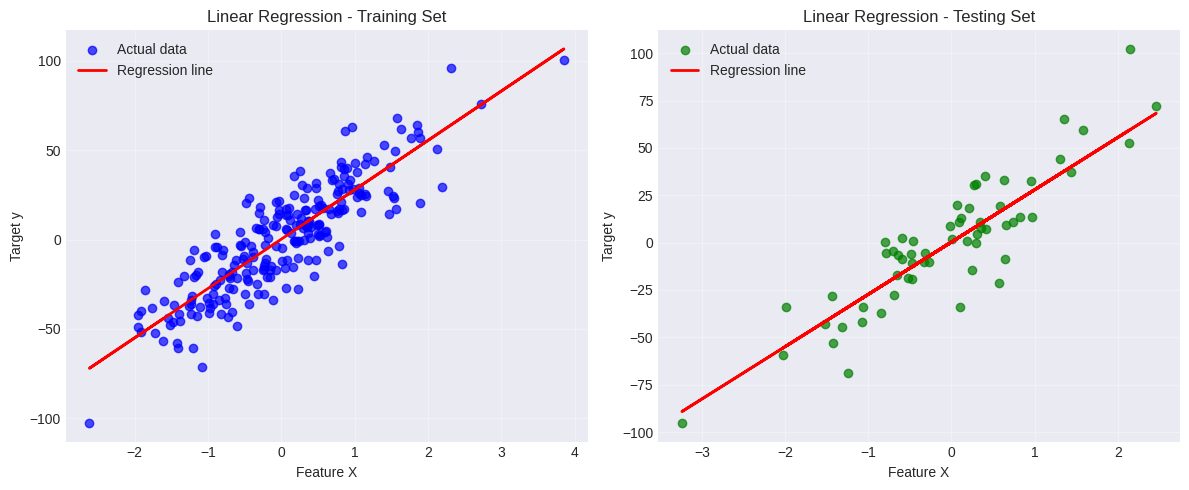

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set plot
axes[0].scatter(X_train, y_train, alpha=0.7, label='Actual data', color='blue')
axes[0].plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression line')
axes[0].set_xlabel('Feature X')
axes[0].set_ylabel('Target y')
axes[0].set_title('Linear Regression - Training Set')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set plot
axes[1].scatter(X_test, y_test, alpha=0.7, label='Actual data', color='green')
axes[1].plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression line')
axes[1].set_xlabel('Feature X')
axes[1].set_ylabel('Target y')
axes[1].set_title('Linear Regression - Testing Set')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [7]:
print("Loading Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Classes: {data.target_names}")
print(f"Features: {data.feature_names[:5]}...")

Loading Cancer dataset...
Dataset shape: (569, 30)
Number of features: 30
Classes: ['malignant' 'benign']
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in testing set: {np.bincount(y_test)}")

# Standardize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 398 samples
Testing set size: 171 samples
Class distribution in training set: [148 250]
Class distribution in testing set: [ 64 107]


In [9]:
print("Training Logistic Regression model...")
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

Training Logistic Regression model...


In [10]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Model Performance Metrics:")
print("-" * 40)
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Performance Metrics:
----------------------------------------
Training Accuracy: 0.9874
Testing Accuracy: 0.9883
Precision: 0.9907
Recall: 0.9907
F1-Score: 0.9907


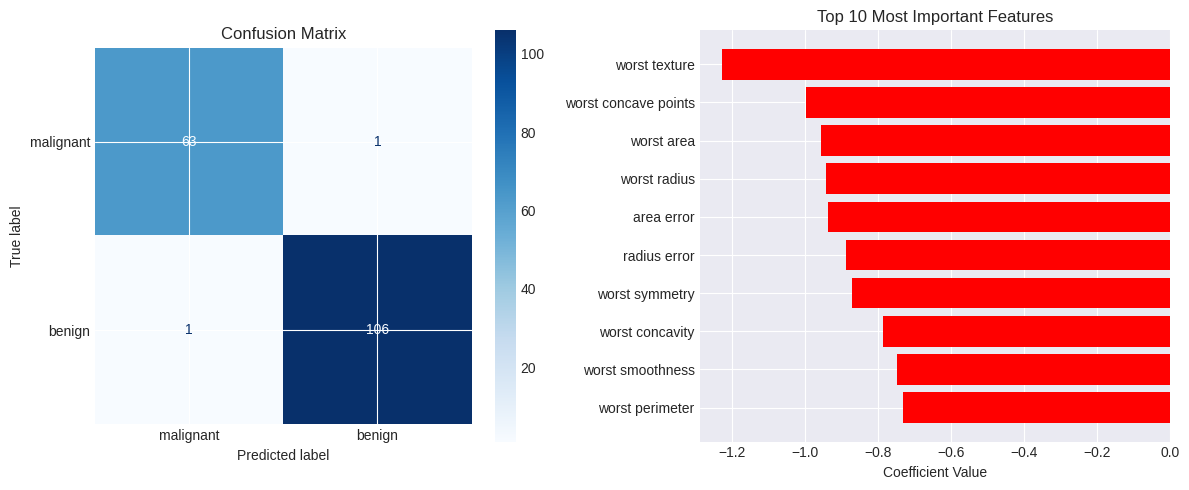

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix')

# Feature importance (top 10 coefficients)
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': logistic_model.coef_[0]
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot top 10 features
top_features = feature_importance.head(10)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
axes[1].barh(range(len(top_features)), top_features['Coefficient'], color=colors)
axes[1].set_yticks(range(len(top_features)))
axes[1].set_yticklabels(top_features['Feature'])
axes[1].set_xlabel('Coefficient Value')
axes[1].set_title('Top 10 Most Important Features')
axes[1].invert_yaxis()  # Highest coefficient at top

plt.tight_layout()
plt.show()


In [12]:
print("Top 10 Model Coefficients (Feature Importance):")
print("-" * 40)
for idx, row in top_features.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']:25} Coefficient: {row['Coefficient']:8.4f} ({direction} probability of malignant)")

print("\nInterpretation:")
print("-" * 40)
print("• Positive coefficients increase probability of malignant class")
print("• Negative coefficients decrease probability of malignant class")
print("• Larger absolute values indicate stronger feature influence")
print(f"\nModel intercept: {logistic_model.intercept_[0]:.4f}")

Top 10 Model Coefficients (Feature Importance):
----------------------------------------
worst texture             Coefficient:  -1.2263 (decreases probability of malignant)
worst concave points      Coefficient:  -0.9968 (decreases probability of malignant)
worst area                Coefficient:  -0.9550 (decreases probability of malignant)
worst radius              Coefficient:  -0.9411 (decreases probability of malignant)
area error                Coefficient:  -0.9375 (decreases probability of malignant)
radius error              Coefficient:  -0.8864 (decreases probability of malignant)
worst symmetry            Coefficient:  -0.8694 (decreases probability of malignant)
worst concavity           Coefficient:  -0.7860 (decreases probability of malignant)
worst smoothness          Coefficient:  -0.7490 (decreases probability of malignant)
worst perimeter           Coefficient:  -0.7310 (decreases probability of malignant)

Interpretation:
----------------------------------------
• P

In [13]:
print("Decision Boundary Visualization (using two most important features)...")

top_two_features = feature_importance.head(2)['Feature'].values

# Find indices of top two features
idx1 = np.where(data.feature_names == top_two_features[0])[0][0]
idx2 = np.where(data.feature_names == top_two_features[1])[0][0]

# Train new model with only two features for visualization
X_two_features = X[:, [idx1, idx2]]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_two_features, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

# Train model
model_2d = LogisticRegression(max_iter=1000, random_state=42)
model_2d.fit(X_train_2d_scaled, y_train_2d)

Decision Boundary Visualization (using two most important features)...


LogisticRegression(max_iter=1000, random_state=42)

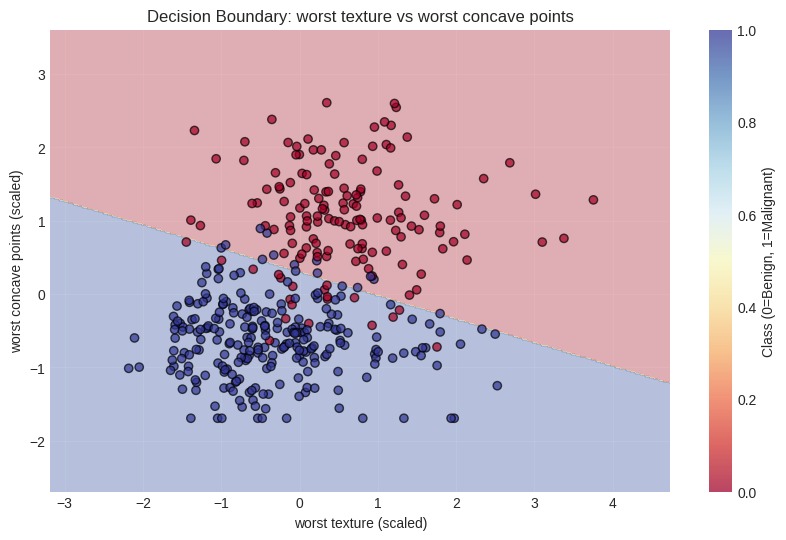

In [14]:
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in mesh
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
scatter = plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1],
                     c=y_train_2d, cmap='RdYlBu', edgecolors='k', alpha=0.7)
plt.xlabel(f'{top_two_features[0]} (scaled)')
plt.ylabel(f'{top_two_features[1]} (scaled)')
plt.title(f'Decision Boundary: {top_two_features[0]} vs {top_two_features[1]}')
plt.colorbar(scatter, label='Class (0=Benign, 1=Malignant)')
plt.grid(True, alpha=0.3)
plt.show()
